In [4]:
df_detail.head(2)

,Arrival Time,Check In Date,Completion Date,Customer Facing Flag,Customer Key,DCV Ind,DTV Ind,Director,Drive Time Points,Dwelling Type,...,Supervisor,Survey Response Value,Technician,Truck Roll Ind,Verified Vendor,Work Order Category,Work Order Class,Work Order Number,Work Order Type,Zip Code
0,6/18/2018 10:52:00 AM,6/18/2018 11:17:00 AM,6/18/2018 11:16:00 AM,Y,71479796,0,0,OPEN,2,MDU,...,Brian Ginley,NaN,STEVE HEUSER,1,N,SRO,D,7219822,Sro,44147
1,5/16/2018 2:46:00 PM,6/5/2018 2:46:00 PM,5/16/2018 2:46:00 PM,Y,106221992,0,0,NaN,2,MDU,...,NaN,NaN,S SHORE UNDERGOUNDS 70546,1,N,SRO,C,7266786,Sro,44116


In [5]:
df_detail['Arrival Time'] = pd.to_datetime(df_detail['Arrival Time'], errors = 'coerce')
df_detail['Check In Date'] = pd.to_datetime(df_detail['Check In Date'], errors = 'coerce')
#df_detail['Completion Date'] = pd.to_datetime(df_detail['Completion Date'], errors = 'coerce')

In [6]:
# df_detail['New Time'] = df_detail['Completion Date'].astype(np.int64) - \
#     df_detail[['Arrival Time','Check In Date']].min(axis=1).astype(np.int64)

# df_detail['New Time'] = df_detail[['Arrival Time','Check In Date']].min(axis=1)

df_detail['New Time'] = (df_detail['Check In Date'] - df_detail['Arrival Time']).dt.total_seconds() / 60


In [7]:
df_detail.head(2)

,Arrival Time,Check In Date,Completion Date,Customer Facing Flag,Customer Key,DCV Ind,DTV Ind,Director,Drive Time Points,Dwelling Type,...,Survey Response Value,Technician,Truck Roll Ind,Verified Vendor,Work Order Category,Work Order Class,Work Order Number,Work Order Type,Zip Code,New Time
0,2018-06-18 10:52:00,2018-06-18 11:17:00,6/18/2018 11:16:00 AM,Y,71479796,0,0,OPEN,2,MDU,...,NaN,STEVE HEUSER,1,N,SRO,D,7219822,Sro,44147,25.0
1,2018-05-16 14:46:00,2018-06-05 14:46:00,5/16/2018 2:46:00 PM,Y,106221992,0,0,NaN,2,MDU,...,NaN,S SHORE UNDERGOUNDS 70546,1,N,SRO,C,7266786,Sro,44116,28800.0


In [21]:
cbss_df = df_detail[(df_detail["Q Code"]=="K") | (df_detail["Q Code"]=="I")]

In [22]:
df_subset = df_detail.drop(columns=['Arrival Time','Check In Date','Completion Date'])
df_subset = df_subset.drop(columns=['Customer Key','Director','Employee Type Group','Entered By Employee Typ Group'])
df_subset = df_subset.drop(columns=['Entered By Employee Type Code','Entered By Employee Type Desc','Entered By Labor Type','Entered By Name','Technician'])
df_subset = df_subset.drop(columns=['Entered Date','FSI Ind','Field Tech Ind','Installer ID','Manager'])
df_subset = df_subset.drop(columns=['Number of Records','Site Code','Supervisor'])
df_subset = df_subset.drop(columns=['Work Order Category','Job Code Desc','Work Order Number'])
df_subset = df_subset.drop(columns=['Entered By Site','NPS Status','Service Call Product'])
df_subset = df_subset.drop(columns=['Repeat Solution Code - Ops','Repeat Solution Code - iDrive','Repeat Solution Desc - Ops','Repeat Solution Desc - iDrive','Repeat Solution Functional Group - Ops','Repeat Solution Group - Ops','Repeat Solution Group - iDrive','Repeat Work Order Entered Date - Ops','Repeat Work Order Number - Ops','Repeat Work Order Number - iDrive','Solution Code','Solution Desc','Solution Functional Group','Solution Group'])
df_subset = df_subset.drop(columns=['Fidning Code','Filtered Finding Ind','Filtered Solution Ind','Finding Desc'])
df_subset = df_subset.drop(columns=['Finding Functional Group','Finding Group'])
df_subset = df_subset.drop(columns=['Sub System','Zip Code','Node'])
df_subset = df_subset.drop(columns=['Repeat DCV Ind - Ops',
'Repeat DTV Ind - Ops',
'Repeat Filtered Finding Ind - Ops',
'Repeat Filtered Finding Ind - iDrive',
'Repeat Filtered Solution Ind - Ops',
'Repeat Finding Code - Ops',
'Repeat Finding Code - iDrive',
'Repeat Finding Desc - Ops',
'Repeat Finding Desc - iDrive',
'Repeat Finding Functional Group - Ops',
'Repeat Finding Group - Ops',
'Repeat Finding Group - iDrive',
'Repeat Interval - Ops',
'Repeat Interval - iDrive',
'Repeat Points',
'Repeat Service Call Product - Ops'])
df_subset = df_subset.drop(columns=['QC Chargeback Amount','QC Chargeback Eligibility','QC Inspection Opportunities','QC Inspection Passes','QC Remote Inspection','QC iDrive Eligibility'])
df_subset = df_subset.drop(columns=['Repeat Filtered Solution Ind - iDrive','Repeat Flag - iDrive','Office Only Flag Key'])

In [23]:
df_subset2 = df_subset[df_subset['New Time'].notnull()]
#df_subset2 = df_subset2[df_subset2['New Time'] > 1]  
#df_subset2 = df_subset2[df_subset2 < 400]  

indexNames = df_subset2[ df_subset2['New Time'] < 1 ].index
df_subset2.drop(indexNames , inplace=True)

indexNames = df_subset2[ df_subset2['New Time'] > 400 ].index
df_subset2.drop(indexNames , inplace=True)

/Users/rsimon/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [24]:
df_survey_subset = df_subset2[df_subset2['Survey Response Value'].notnull()]
df_nosurvey_subset = df_subset2[df_subset2['Survey Response Value'].isnull()]

In [30]:
cbss_df = df_nosurvey_subset[(df_nosurvey_subset["Q Code"]=="K") | (df_nosurvey_subset["Q Code"]=="I")]

In [105]:
cbss_df.to_csv("cbss_df.csv")
df_nosurvey_subset.to_csv("full_df.csv")

In [ ]:
#df_survey_subset.describe()

In [54]:
#df_nosurvey_subset.drop(columns=['Survey Response Value'] , inplace=True)
#df_nosurvey_subset.describe()

/Users/rsimon/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,DCV Ind,DTV Ind,Drive Time Points,HC Equipment Passed,HC Equipment,Points,Service Call Ind,Truck Roll Ind,New Time
count,189835.000000,189835.000000,189835.000000,189835.000000,189835.000000,189835.000000,189835.000000,189835.000000,189835.000000
mean,0.027972,0.007385,2.984887,0.773250,0.801780,26.582664,0.150078,0.956194,123.669934
std,0.164892,0.085620,0.209271,1.198638,1.235705,27.440311,0.357149,0.204665,111.047073
min,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,13.000000,0.000000,1.000000,37.000000
50%,0.000000,0.000000,3.000000,0.000000,0.000000,18.000000,0.000000,1.000000,90.000000
75%,0.000000,0.000000,3.000000,1.000000,1.000000,33.000000,0.000000,1.000000,183.000000
max,1.000000,1.000000,6.000000,29.000000,29.000000,2343.000000,1.000000,1.000000,400.000000


In [ ]:
#pandas_profiling.ProfileReport(df_nosurvey_subset)

In [55]:
nosurvey_drivetimepoints = df_nosurvey_subset['Drive Time Points']

In [56]:
cbss_df_drivetimepoints = cbss_df['Drive Time Points']

In [57]:
nosurvey_points = df_nosurvey_subset['Points']

In [58]:
cbss_df_points = cbss_df['Points']

In [59]:
nosurvey_y = df_nosurvey_subset['New Time']

In [60]:
cbss_df_y = cbss_df['New Time']

In [61]:
# Calculate the absolute errors
errors = abs(nosurvey_points*5 - nosurvey_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'minutes.')

Mean Absolute Error: 95.89 minutes.


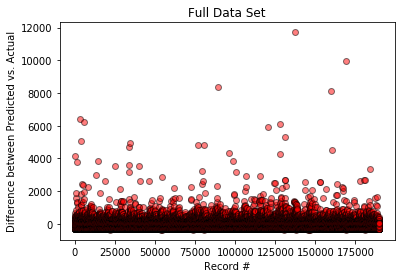

In [98]:
plt.scatter(range(len(nosurvey_y)), (nosurvey_points*5 - nosurvey_y), marker="o", facecolors="red", edgecolors="black",
             alpha=0.50)
#plt.scatter(range(len(y_test)), y_test, marker="+", facecolors="blue", edgecolors="black",
#             alpha=0.50)
plt.title("Full Data Set")
plt.xlabel("Record #")
plt.ylabel("Difference between Predicted vs. Actual")
plt.savefig("FullDataSet_CurrentState.png")
plt.show()

In [62]:
# Calculate the absolute errors
errors = abs(cbss_df_points*5 - cbss_df_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'minutes.')

Mean Absolute Error: 103.4 minutes.


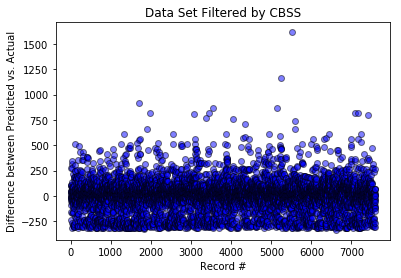

In [99]:
plt.scatter(range(len(cbss_df_y)), (cbss_df_points*5 - cbss_df_y), marker="o", facecolors="blue", edgecolors="black",
             alpha=0.50)
#plt.scatter(range(len(y_test)), y_test, marker="+", facecolors="blue", edgecolors="black",
#             alpha=0.50)
plt.title("Data Set Filtered by CBSS")
plt.xlabel("Record #")
plt.ylabel("Difference between Predicted vs. Actual")
plt.savefig("CBSSDataSet_CurrentState.png")
plt.show()

In [63]:
nosurvey_X = df_nosurvey_subset.drop(columns=['Drive Time Points','Points','New Time'])

In [64]:
cbss_df_X = cbss_df.drop(columns=['Drive Time Points','Points','New Time','Survey Response Value'])

In [65]:
nosurvey_X = sm.add_constant(nosurvey_X)
dum_ns_X = pd.get_dummies(nosurvey_X)

In [73]:
dum_ns_X.shape

(189835, 85)

In [66]:
cbss_df_X = sm.add_constant(cbss_df_X)
cbss_dum_X = pd.get_dummies(cbss_df_X)

In [74]:
cbss_dum_X.shape

(7592, 64)

In [75]:
#dum_ns_X.info()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(dum_ns_X, nosurvey_y, test_size = 0.2, random_state = 0)

In [77]:
model=sm.OLS(y_train, X_train)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               New Time   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     3034.
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        07:18:26   Log-Likelihood:            -8.6961e+05
No. Observations:              151868   AIC:                         1.739e+06
Df Residuals:                  151805   BIC:                         1.740e+06
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                              -6.522e+11   1.95e+12     -0.334      0.739   -4.48e+12    3.18e+12
DCV Ind                            -2.005e+12   5.73e+12     -0.350      0.726   -1.32e+13    9.22e+12
DTV Ind                            -1.684e+12   6.96e+12     -0.242      0.809   -1.53e+13     1.2e+13
HC Equipment Passed                   -0.4017      0.899     -0.447      0.655      -2.164       1.361
HC Equipment                           4.9463      0.871      5.679      0.000       3.239       6.654
Service Call Ind                    7.628e+12   1.21e+13      0.633      0.527    -1.6e+13    3.13e+13
Truck Roll Ind                        59.6142      1.029     57.921      0.000      57.597      61.631
Customer Facing Flag_N              9.804e+11   2.15e+13      0.046      0.964   -4.12e+13    4.31e+13
Customer Facing Flag_Y              9.804e+11   2.15e+13      0.046      0.964   -4.12e+13    4.31e+13
Dwelling Type_MDU                  -3.815e+11   3.88e+12     -0.098      0.922   -7.98e+12    7.22e+12
Dwelling Type_Non-Residential      -3.815e+11   3.88e+12     -0.098      0.922   -7.98e+12    7.22e+12
Dwelling Type_SFU                  -3.815e+11   3.88e+12     -0.098      0.922   -7.98e+12    7.22e+12
Employee Type Code_5I              -9.448e+10   1.13e+13     -0.008      0.993   -2.22e+13     2.2e+13
Employee Type Code_H3               1.411e+11   3.54e+13      0.004      0.997   -6.92e+13    6.95e+13
Employee Type Code_H5              -9.448e+10   1.13e+13     -0.008      0.993   -2.22e+13     2.2e+13
Job Type_Diagnostic Customer Visit -4.289e+11   5.57e+12     -0.077      0.939   -1.13e+13    1.05e+13
Job Type_Diagnostic Tap Visit      -7.504e+11   6.11e+12     -0.123      0.902   -1.27e+13    1.12e+13
Job Type_Disconnect                 7.567e+11   2.17e+12      0.348      0.728    -3.5e+12    5.02e+12
Job Type_Install                    1.266e+12   3.31e+12      0.383      0.702   -5.22e+12    7.75e+12
Job Type_SRO                        6.859e+11   3.29e+12      0.208      0.835   -5.77e+12    7.14e+12
Job Type_Trouble Call              -2.434e+12   3.46e+12     -0.704      0.481   -9.21e+12    4.34e+12
Labor Type_Contractor              -6.509e+11   1.29e+13     -0.051      0.960   -2.59e+13    2.46e+13
Labor Type_In House                -4.153e+11   1.21e+13     -0.034      0.973   -2.41e+13    2.33e+13
Q Code_%                           -5.372e+10   3.72e+11     -0.145      0.885   -7.82e+11    6.75e+11
Q Code_&                           -5.372e+10   3.72e+11     -0.145      0.885   -7.82e+11    6.75e+11
Q Code_0                           -5.372e+10   3.72e+11     -0.145      0.885   -7.82e+11    6.75e+11
Q Code_1                           -5.372e+10   3.72e+11     -0.145      0.885   -7.82e+11    6.

In [78]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

print(regressor.intercept_)
print(regressor.coef_)

262360751286715.12
[-2.75074072e+09  1.17481755e+14 -5.11768573e+13 -1.33637362e-01
  4.66352507e+00  1.29428197e+14  6.00169318e+01 -3.30159544e+13
 -3.30159544e+13 -4.41395105e+12 -4.41395105e+12 -4.41395105e+12
 -1.14340993e+14  2.33585588e+13 -1.14340993e+14 -1.44720263e+14
  2.39383486e+13 -1.15155982e+13  9.99781987e+13 -1.42858217e+14
 -2.72385087e+13 -5.36838519e+13  8.40157000e+13 -1.72353542e+13
 -1.72353542e+13 -1.72353542e+13 -1.72353542e+13 -1.72353542e+13
 -1.72353542e+13 -1.72353542e+13 -1.72353542e+13 -1.72353542e+13
 -1.72353542e+13 -1.72353542e+13 -1.72353542e+13 -1.72353542e+13
 -1.72353542e+13 -1.72353542e+13 -1.72353542e+13 -1.72353542e+13
 -1.72353542e+13 -1.72353542e+13 -1.72353542e+13 -9.31515422e+13
 -7.08136328e+13 -1.80841150e+14 -9.02984040e+13  7.60963995e+13
 -5.98180627e+13  6.86655320e+13  6.86655320e+13 -2.18772141e+13
 -2.18772141e+13 -5.23575555e+13 -4.13619853e+13 -1.88272018e+14
 -2.18772141e+13 -2.18772141e+13 -5.23575555e+13 -4.13619853e+13
 -4.13

In [79]:
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 55.419166644717784
Mean Squared Error: 5447.829535558841
Root Mean Squared Error: 73.809413597175


In [102]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [103]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'minutes.')

Mean Absolute Error: 51.24 minutes.


In [107]:
# Use the forest's predict method on the test data
predictions = rf.predict(dum_ns_X)
# Calculate the absolute errors
errors = abs(predictions - nosurvey_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'minutes.')

Mean Absolute Error: 48.38 minutes.


In [108]:
nosurvey_X["predictions"]=predictions

In [109]:
nosurvey_X.to_csv("full_df.csv")

In [87]:
import matplotlib.pyplot as plt

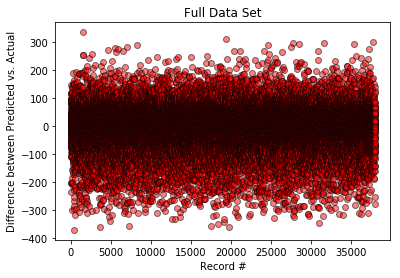

In [104]:
plt.scatter(range(len(predictions)), (predictions-y_test), marker="o", facecolors="red", edgecolors="black",
             alpha=0.50)
#plt.scatter(range(len(y_test)), y_test, marker="+", facecolors="blue", edgecolors="black",
#             alpha=0.50)
plt.title("Full Data Set")
plt.xlabel("Record #")
plt.ylabel("Difference between Predicted vs. Actual")
plt.savefig("FullDataSet_Model.png")
plt.show()